## Verificação do sinal
Encontrou-se um valor destoante de ac2rad em 'vertical-misalignment/0.63mm/61.8496.csv'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dados no tempo
signals = pd.read_csv('../mafaulda/vertical-misalignment/0.63mm/61.8496.csv', header=None, 
                      names=['tacômetro', 'ax1', 'rad1', 'tg1', 
                            'ax2', 'rad2', 'tg2', 'microfone'])

<AxesSubplot:>

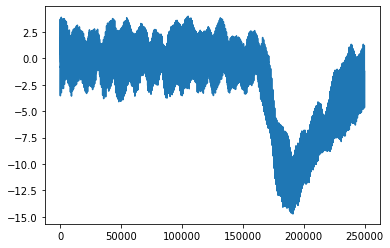

In [3]:
signals['ax2'].plot();

# Corrigindo o DataFrame
Deve ser rodado uma única vez.

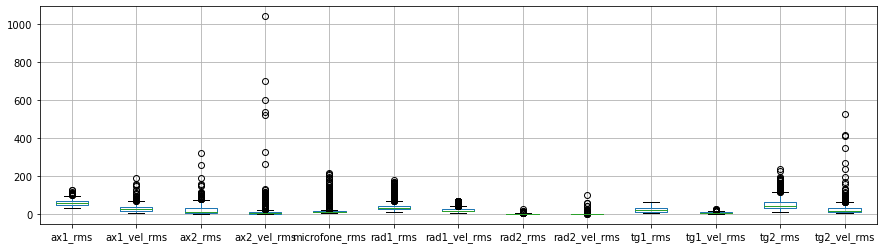

In [7]:
# abre arquivo e mostra o outlier
df = pd.read_csv('../data.csv')

rms = [col for col in list(df.columns) if 'rms' in col]
df[rms].boxplot(figsize=(15,4));

In [5]:
# medias = [col for col in list(df.columns) if 'mean' in col]
# df[medias].boxplot(figsize=(10,4));

In [8]:
df.loc[(df['severidade'] == 0.63) & (df['rotacao'] > 60.5), ['defeito', 'severidade', 'rotacao', 'ax2_rms', 'ax2_vel_rms']]

,defeito,severidade,rotacao,ax2_rms,ax2_vel_rms
296,desalinhamento_vertical,0.63,60.8256,53.659326,4.618224
297,desalinhamento_vertical,0.63,61.8496,320.842618,9.861142


Por simplificação e por similaridade, o valor do sinal mais próximo (rot_vel=60.825) será copiado

In [9]:
# substitui valor
# df.at[297,'ax2_mean'] = df.at[296,'ax2_mean']
df.at[297,'ax2_rms']  = df.at[296,'ax2_rms']
df.at[297,'ax2_vel_rms']  = df.at[296,'ax2_vel_rms'] 

In [13]:
df.loc[(df['severidade'] == 0.63) & (df['rotacao'] > 60.5), ['defeito', 'severidade','rotacao', 'ax2_rms', 'ax2_vel_rms']]

,defeito,severidade,rotacao,ax2_rms,ax2_vel_rms
296,desalinhamento_vertical,0.63,60.8256,53.659326,4.618224
297,desalinhamento_vertical,0.63,61.8496,53.659326,4.618224


In [11]:
# salva mudança no arquivo
f = open("../data.csv", "w")
df.to_csv(f, line_terminator='\n', index=False)
f.close()

## Checagem final

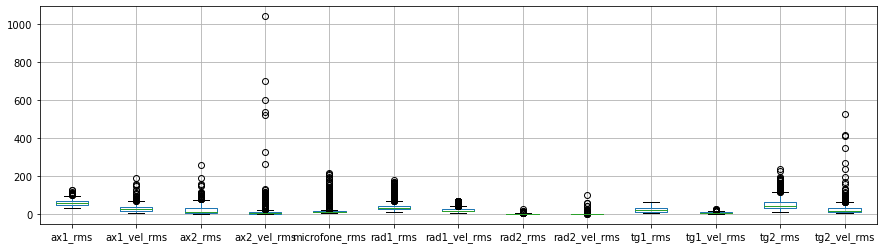

In [12]:
# abre novamente arquivo em nova variável
df_NEW = pd.read_csv('../data.csv')

df_NEW[rms].boxplot(figsize=(15,4));

# Investigando outro pico

In [17]:
df_NEW.loc[df_NEW['ax2_vel_rms'].argmax()]

defeito           desbalanceamento
severidade                      35
rotacao                    12.0832
fundamental                11.8236
ax1_1h                     5.60945
ax1_2h                      3.3181
ax1_3h                     4.84891
ax1_entr                   2.85654
ax1_kurt                 -0.412146
ax1_rms                     75.824
ax1_vel_rms                151.796
ax2_1h                     29.7866
ax2_2h                     9.32486
ax2_3h                     3.36176
ax2_entr                   4.16504
ax2_kurt                  -1.10094
ax2_rms                    257.394
ax2_vel_rms                1041.52
microfone_1h              0.759286
microfone_2h              0.560983
microfone_3h              0.923104
microfone_entr            0.973293
microfone_kurt             1.01174
microfone_rms              9.13038
rad1_1h                    1.59596
rad1_2h                   0.862261
rad1_3h                   0.876809
rad1_entr                  1.73304
rad1_kurt           

In [19]:
# dados no tempo
signals = pd.read_csv('../mafaulda/imbalance/35g/12.0832.csv', header=None, 
                      names=['tacômetro', 'ax1', 'rad1', 'tg1', 
                            'ax2', 'rad2', 'tg2', 'microfone'])

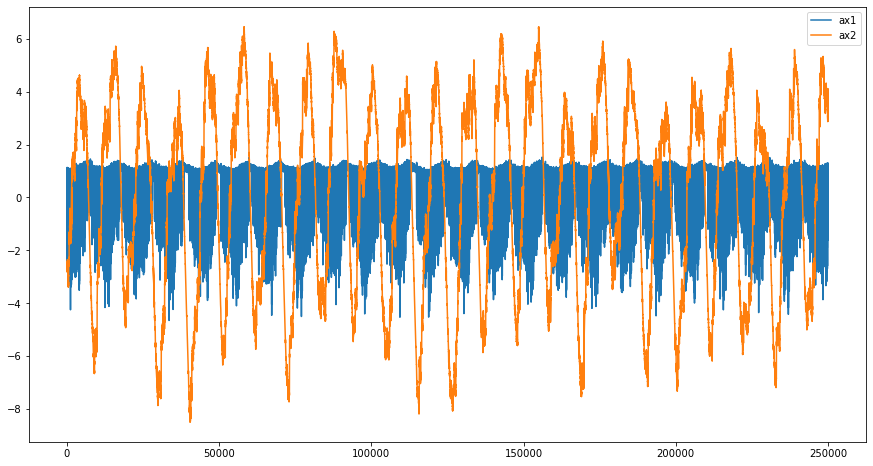

In [23]:
signals[['ax1','ax2']].plot(figsize=(15,8));

Aparentemente a baixa frequência de alta intensidade presente no sinal exacerbou o valor do RMS da velocidade.